In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [285]:
heart_df = pd.read_csv('heart.csv')

In [286]:
def remove_outliers_inplace(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)


In [287]:
heart_df.head(5)

,Age,sex,Chest Pain,Rest BP,Cholestrol,Fasting Blood Sugar,restecg,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Vessel Count,Thallium,Outcome
0,52,Male,Angina Pectoris,125.0,212.0,False,Arrhythmia,168.0,no,1.0,Downsloping,2.0,Reversible Defect,Negative
1,53,Male,Angina Pectoris,140.0,203.0,True,NSR,155.0,yes,3.1,Upsloping,0.0,Reversible Defect,Negative
2,70,Male,Angina Pectoris,145.0,174.0,False,Arrhythmia,125.0,yes,2.6,Upsloping,0.0,Reversible Defect,Negative
3,61,Male,Angina Pectoris,148.0,203.0,False,Arrhythmia,161.0,no,0.0,Downsloping,1.0,Reversible Defect,Negative
4,62,Female,Angina Pectoris,138.0,294.0,True,Arrhythmia,106.0,no,1.9,Horizontal,3.0,Fixed Defect,Negative


In [288]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1025 non-null   int64  
 1   sex                      1008 non-null   object 
 2   Chest Pain               1017 non-null   object 
 3   Rest BP                  1018 non-null   float64
 4   Cholestrol               1022 non-null   float64
 5   Fasting Blood Sugar      1018 non-null   object 
 6   restecg                  1020 non-null   object 
 7   Max Heart Rate           1019 non-null   float64
 8   Exercise Induced Angina  1017 non-null   object 
 9   Old Peak                 1022 non-null   float64
 10  Slope                    1014 non-null   object 
 11  Vessel Count             1020 non-null   float64
 12  Thallium                 1015 non-null   object 
 13  Outcome                  1016 non-null   object 
dtypes: float64(5), int64(1),

In [289]:
heart_df.isnull().sum()

Age                         0
sex                        17
Chest Pain                  8
Rest BP                     7
Cholestrol                  3
Fasting Blood Sugar         7
restecg                     5
Max Heart Rate              6
Exercise Induced Angina     8
Old Peak                    3
Slope                      11
Vessel Count                5
Thallium                   10
Outcome                     9
dtype: int64

In [290]:
imputer = SimpleImputer(strategy='most_frequent')
heart_df['sex'] = imputer.fit_transform(heart_df[['sex']])

In [291]:
heart_df.dropna(subset=['Chest Pain'], inplace=True)

In [292]:
heart_df['Rest BP'].fillna(120, inplace=True)

In [293]:
# A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal; Mean is 193
cholestrol_mean = heart_df['Cholestrol'].mean()
heart_df['Cholestrol'].fillna(cholestrol_mean, inplace=True)

In [294]:
heart_df['Fasting Blood Sugar'] = imputer.fit_transform(heart_df[['Fasting Blood Sugar']])

In [295]:
heart_df.dropna(subset=['restecg'], inplace=True)

In [296]:
mean_imputer = SimpleImputer(strategy='mean')

heart_df['Max Heart Rate'] = mean_imputer.fit_transform(heart_df[['Max Heart Rate']])

In [297]:
heart_df.dropna(subset=['Exercise Induced Angina'], inplace=True)

In [298]:
heart_df.dropna(subset=['Old Peak'], inplace=True)

In [299]:
heart_df['Slope'] = imputer.fit_transform(heart_df[['Slope']])

In [300]:
heart_df.dropna(subset=['Vessel Count'], inplace=True)

In [301]:
heart_df['Thallium'] = imputer.fit_transform(heart_df[['Thallium']])

In [302]:
heart_df.dropna(subset=['Outcome'], inplace=True)

In [303]:
heart_df.isnull().sum()

Age                        0
sex                        0
Chest Pain                 0
Rest BP                    0
Cholestrol                 0
Fasting Blood Sugar        0
restecg                    0
Max Heart Rate             0
Exercise Induced Angina    0
Old Peak                   0
Slope                      0
Vessel Count               0
Thallium                   0
Outcome                    0
dtype: int64

In [304]:
remove_outliers_inplace(heart_df, 'Rest BP')
remove_outliers_inplace(heart_df, 'Cholestrol')
remove_outliers_inplace(heart_df, 'Max Heart Rate')
remove_outliers_inplace(heart_df, 'Old Peak')

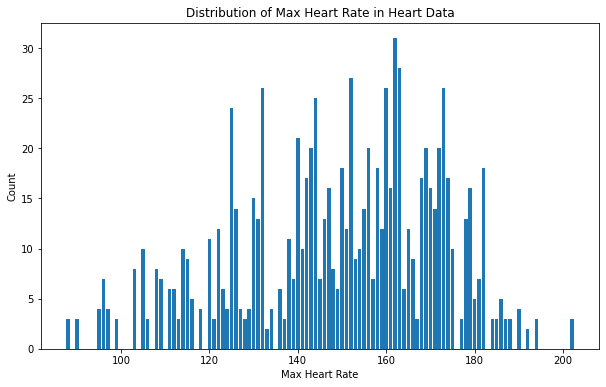

In [305]:
plt.figure(figsize=(10, 6)) 
plt.bar(heart_df['Max Heart Rate'].value_counts().index, heart_df['Max Heart Rate'].value_counts().values)
plt.xlabel('Max Heart Rate')
plt.ylabel('Count')
plt.title('Distribution of Max Heart Rate in Heart Data')
plt.show()

In [306]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Rest BP', 'Cholestrol', 'Max Heart Rate']
heart_df[numerical_columns] = scaler.fit_transform(heart_df[numerical_columns])

In [307]:
heart_df

,Age,sex,Chest Pain,Rest BP,Cholestrol,Fasting Blood Sugar,restecg,Max Heart Rate,Exercise Induced Angina,Old Peak,Slope,Vessel Count,Thallium,Outcome
0,52,Male,Angina Pectoris,0.407895,0.367521,False,Arrhythmia,0.701754,no,1.0,Downsloping,2.0,Reversible Defect,Negative
1,53,Male,Angina Pectoris,0.605263,0.329060,True,NSR,0.587719,yes,3.1,Upsloping,0.0,Reversible Defect,Negative
2,70,Male,Angina Pectoris,0.671053,0.205128,False,Arrhythmia,0.324561,yes,2.6,Upsloping,0.0,Reversible Defect,Negative
3,61,Male,Angina Pectoris,0.710526,0.329060,False,Arrhythmia,0.640351,no,0.0,Downsloping,1.0,Reversible Defect,Negative
4,62,Female,Angina Pectoris,0.578947,0.717949,True,Arrhythmia,0.157895,no,1.9,Horizontal,3.0,Fixed Defect,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Myocardial Infarction,0.605263,0.405983,False,Arrhythmia,0.666667,yes,0.0,Downsloping,0.0,Fixed Defect,Positive
1021,60,Male,Angina Pectoris,0.407895,0.564103,False,NSR,0.464912,yes,2.8,Horizontal,1.0,Reversible Defect,Negative
1022,47,Male,Angina Pectoris,0.210526,0.636752,False,NSR,0.263158,yes,1.0,Horizontal,1.0,Fixed Defect,Negative
1023,50,Female,Angina Pectoris,0.210526,0.547009,False,NSR,0.622807,no,0.0,Downsloping,0.0,Fixed Defect,Positive


In [308]:
heart_df.rename(columns={'Exercise Induced Angina' : 'eia', 'Fasting Blood Sugar': 'fbs'}, inplace=True)
heart_df.sex.replace({"Male":1, "Female":-1}, inplace= True)
heart_df.eia.replace({"yes":1, "no":0}, inplace= True)

In [309]:
label_encoder = LabelEncoder()
heart_df['restecg']=label_encoder.fit_transform(heart_categorical['restecg'])
heart_df['Chest Pain']=label_encoder.fit_transform(heart_categorical['Chest Pain'])
heart_df['Thallium']=label_encoder.fit_transform(heart_categorical['Thallium'])
heart_df['Outcome']=label_encoder.fit_transform(heart_categorical['Outcome'])
heart_df['Slope']=label_encoder.fit_transform(heart_categorical['Slope'])
heart_df['fbs']=label_encoder.fit_transform(heart_categorical['fbs'])

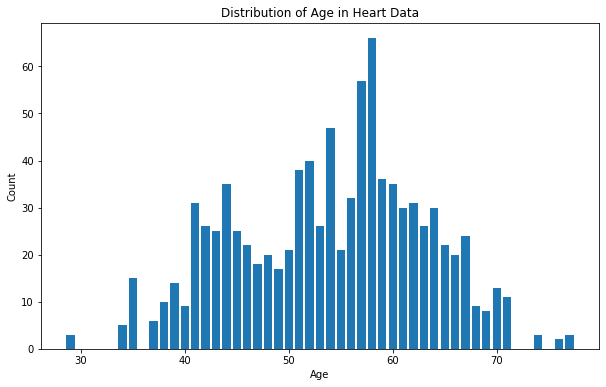

In [310]:
plt.figure(figsize=(10, 6)) 
plt.bar(heart_df['Age'].value_counts().index, heart_df['Age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in Heart Data')
plt.show()


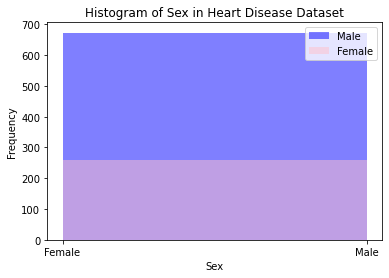

In [317]:
male_data = heart_df[heart_df['sex'] == 1]
female_data = heart_df[heart_df['sex'] == -1]
plt.hist(male_data['sex'], bins=[-1, 1], color='blue', alpha=0.5, label='Male')
plt.hist(female_data['sex'], bins=[-1, 1], color='pink', alpha=0.5, label='Female')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Histogram of Sex in Heart Disease Dataset')
plt.xticks([-1, 1], ['Female','Male']) 
plt.legend()
plt.show()

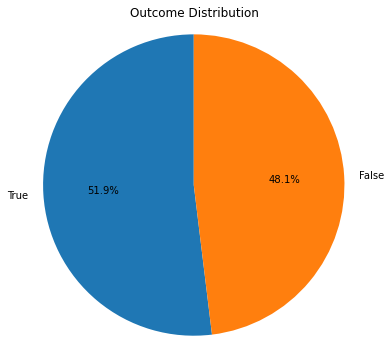

In [318]:
outcome_counts = heart_df['Outcome'].value_counts()
labels = ['True', 'False']
colors = ['#1f77b4', '#ff7f0e']
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outcome Distribution')
plt.axis('equal') 
plt.show()